In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
ruta= "C:/Users/camil/OneDrive/Desktop/Data Science/final_df.xlsx"

df=pd.read_excel(ruta)
#encoding="iso-8859-1"

df.head(5)

,Sexo,Edad,Estado Civil,Region,Servicios,Bienes,Empleados,Horas,Nivel_Educativo,Tipo de Casa,Estrato,tipo_vivienda,Salario,Ingresos
0,Hombre,28,Esta soltero (a),PACÍFICA,5,71.00,0.40,0.00,5.60,1,2.00,3,335583.33,335583.33
1,Mujer,26,Esta soltero (a),PACÍFICA,5,75.00,0.25,0.00,4.00,1,2.00,3,190000.00,190000.00
2,Mujer,22,No esta casado(a) y vive en pareja hace dos añ...,PACÍFICA,5,165.00,0.50,0.00,8.00,2,1.00,3,937500.00,937500.00
3,Hombre,33,Esta soltero (a),PACÍFICA,4,54.00,1.00,0.00,4.00,2,2.00,1,700000.00,700000.00
4,Mujer,25,Esta soltero (a),PACÍFICA,4,35.00,0.50,0.00,5.50,1,1.00,3,230750.00,301033.33


In [27]:
df.shape

(2299, 14)

Explicacion variables:
1. Sexo: sexo del jefe o cabeza del hogar entrevistado.
2. Estado civil: del jefe o cabeza de hogar entrevistado.
3. Región: región de colombia donde está ubicado el hogar
4. Servicios: escala de 0 a 5, donde 0 es ningun servicio y 5 es: agua,luz, gas, internet, televisión.
5. Bienes: se le da una ponderación al tipo de bien y al final se suman las ponderaciones para obtener el total.
6. Empleados: % de miembros del hogar en edad de trabajar que se encuentran trabajando.
7. Horas: 

In [28]:
df.columns.to_list() 

['Sexo',
 'Edad',
 'Estado Civil',
 'Region',
 'Servicios',
 'Bienes',
 'Empleados',
 'Horas',
 'Nivel_Educativo',
 'Tipo de Casa',
 'Estrato',
 'tipo_vivienda',
 'Salario',
 'Ingresos']

In [29]:
round(df.describe(),3)

,Edad,Servicios,Bienes,Empleados,Horas,Nivel_Educativo,Tipo de Casa,Estrato,tipo_vivienda,Salario,Ingresos
count,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2289.00,2299.00,2299.00,2299.00
mean,36.21,4.37,172.45,0.64,1.70,8.06,1.47,2.10,2.41,777675.94,924721.17
std,10.41,0.99,176.83,0.27,8.27,4.03,0.63,1.43,1.28,1065359.76,1555414.45
min,15.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,100000.00,100000.00
25%,28.00,4.00,45.00,0.50,0.00,5.00,1.00,1.00,1.00,288194.44,330291.01
50%,34.00,5.00,128.00,0.50,0.00,7.67,1.00,2.00,3.00,467652.16,517500.00
75%,42.00,5.00,229.00,1.00,0.00,10.67,2.00,3.00,3.00,852222.22,954916.67
max,79.00,5.00,2575.00,1.00,182.00,16.00,6.00,9.00,6.00,18277941.00,26571008.25


In [30]:
#Recodificacion variable tipo__vivienda
df["tipo_vivienda"]=df["tipo_vivienda"].replace([1,2,3,4,5,6],["Casa","Apartamento","Cuarto en Inquilinato","Cuarto Otro","Indígena","Otra"])

In [31]:
df.tipo_vivienda.value_counts()

Cuarto en Inquilinato    951
Casa                     892
Cuarto Otro              232
Indígena                 107
Apartamento               92
Otra                      25
Name: tipo_vivienda, dtype: int64

In [32]:
#Recodificacion variable estrato
df["Estrato"]=df["Estrato"].replace([0,1,2,3,4,5,6,9],["0","1","2","3","4","5","6",np.nan])

In [33]:
df.Estrato.value_counts()

1    756
2    749
3    496
4    128
0     87
5     16
6     10
Name: Estrato, dtype: int64

In [34]:
df["Tipo de Casa"]=df["Tipo de Casa"].replace([1,2,3,4,5,6],["Propia pagada","Propia pagando", "En arriendo", "En usufructo","Sin título","Otra"])

In [35]:
df["Tipo de Casa"].value_counts()

Propia pagada     1356
Propia pagando     855
En arriendo         58
En usufructo        25
Otra                 3
Sin título           2
Name: Tipo de Casa, dtype: int64

In [36]:
pd.set_option('display.float_format',lambda x:'%.2f'% x) #quitar la notacion cientifica
df.describe()

,Edad,Servicios,Bienes,Empleados,Horas,Nivel_Educativo,Salario,Ingresos
count,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00,2299.00
mean,36.21,4.37,172.45,0.64,1.70,8.06,777675.94,924721.17
std,10.41,0.99,176.83,0.27,8.27,4.03,1065359.76,1555414.45
min,15.00,0.00,0.00,0.00,0.00,0.00,100000.00,100000.00
25%,28.00,4.00,45.00,0.50,0.00,5.00,288194.44,330291.01
50%,34.00,5.00,128.00,0.50,0.00,7.67,467652.16,517500.00
75%,42.00,5.00,229.00,1.00,0.00,10.67,852222.22,954916.67
max,79.00,5.00,2575.00,1.00,182.00,16.00,18277941.00,26571008.25


In [37]:
## Variables del conjunto de datos
df.columns

Index(['Sexo', 'Edad', 'Estado Civil', 'Region', 'Servicios', 'Bienes',
       'Empleados', 'Horas', 'Nivel_Educativo', 'Tipo de Casa', 'Estrato',
       'tipo_vivienda', 'Salario', 'Ingresos'],
      dtype='object')

In [38]:
## Variables cualitativas
cualitativas=['Sexo', 'Estado Civil', 'Region', 'Tipo de Casa', 'Estrato',
       'tipo_vivienda']
cualitativas

['Sexo', 'Estado Civil', 'Region', 'Tipo de Casa', 'Estrato', 'tipo_vivienda']

In [39]:
## Variables cuantitativas
cuantitativas=df.columns.drop(cualitativas)
cuantitativas

Index(['Edad', 'Servicios', 'Bienes', 'Empleados', 'Horas', 'Nivel_Educativo',
       'Salario', 'Ingresos'],
      dtype='object')

In [49]:
#preguntas de interés 
#1. tienen mejores ingresos los hogares encabezados por una mujer o por un hombre? 
#2. un mayor nivel de ingresos representa un mayor nivel de bienes en el hogar? 
#3. existe alguna relacion entre el nivel de bienes y el nivel se servicios en el hogar? 
#4. cual es la region que presenta mejores niveles educativos?
#5. dicha region tambien tiene los mejores ingresos? 

<Axes: xlabel='Sexo', ylabel='Ingresos'>

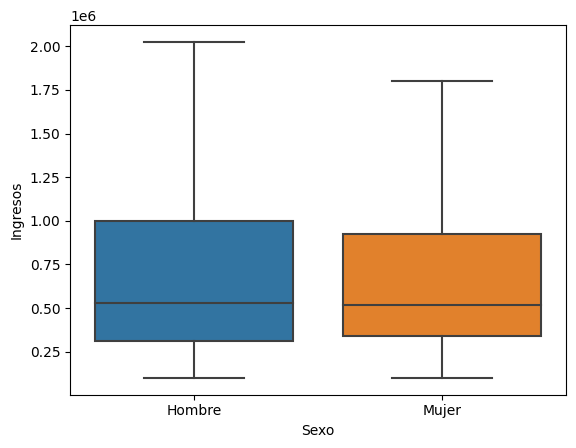

In [57]:
#1. tienen mejores ingresos los hogares encabezados por una mujer o por un hombre? 
sns.boxplot(data=df, x='Sexo',y='Ingresos',showfliers=False)

En el boxplot podemos ver que esxiste una diferencia entre los ingresos maximos registrados por los
hombres con respecto a las mujeres 

Text(0.5, 0, 'Sexo')

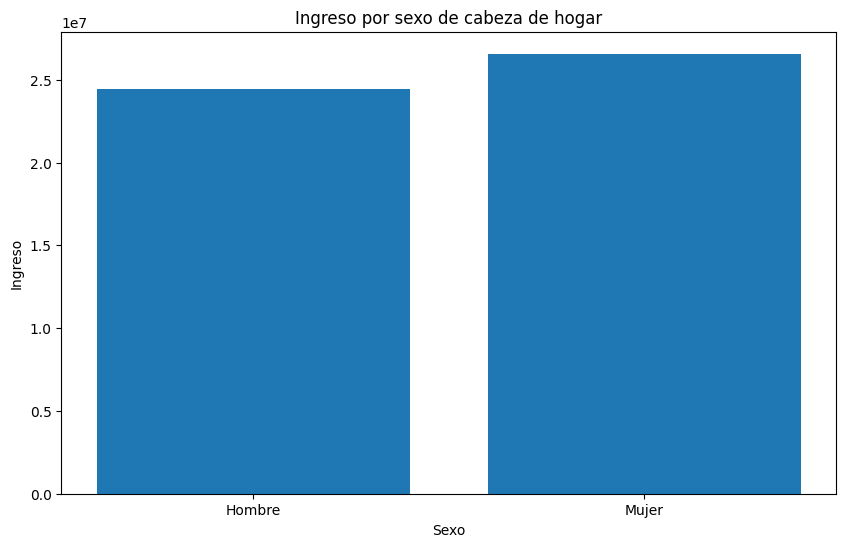

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df["Sexo"],df["Ingresos"])
ax.set_title('Ingreso por sexo de cabeza de hogar')
ax.set_ylabel('Ingreso')
ax.set_xlabel('Sexo')

Se deben eliminar valores atipicos para poder comparar con boxplot anterior

<Axes: xlabel='Ingresos', ylabel='Bienes'>

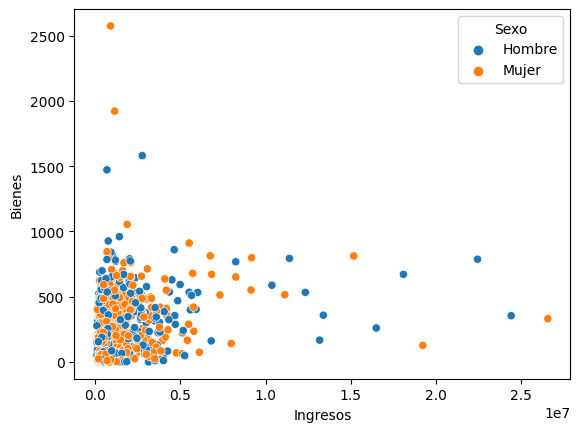

In [58]:
#2. un mayor nivel de ingresos representa un mayor nivel de bienes en el hogar? 
sns.scatterplot(data=df, x="Ingresos", y="Bienes",hue="Sexo")

El Scatterplot no muestra una relación aparente entre los ingresos y el nivel de bienes en el hogar.

<Axes: xlabel='Bienes', ylabel='Servicios'>

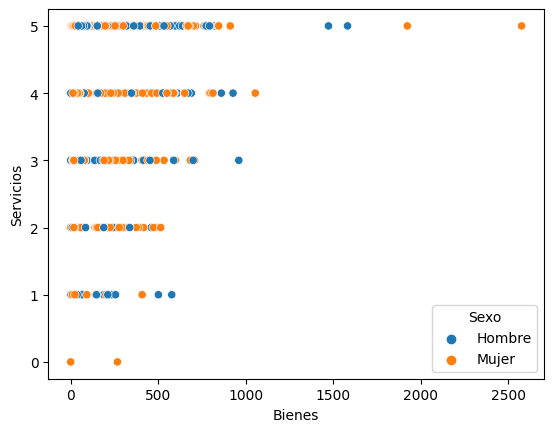

In [60]:
#3. existe alguna relacion entre el nivel de bienes y el nivel de servicios en el hogar? 
sns.scatterplot(data=df, x="Bienes", y="Servicios",hue="Sexo")


<Axes: xlabel='Bienes', ylabel='Count'>

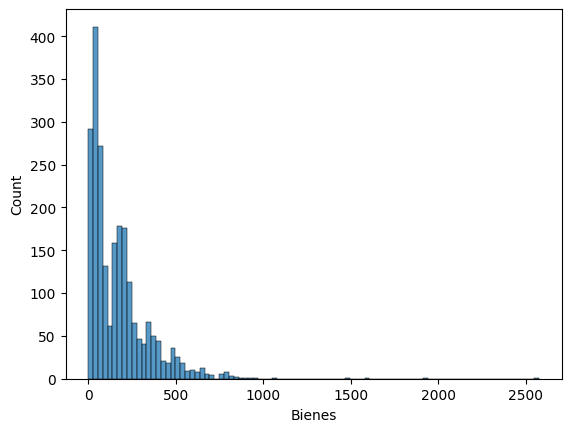

In [63]:
sns.histplot(data=df, x='Bienes')

<Axes: xlabel='Servicios', ylabel='Count'>

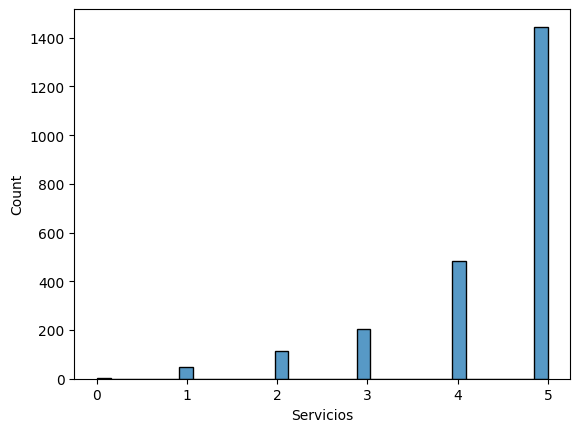

In [64]:
sns.histplot(data=df, x='Servicios')

Mientras un alto porcentaje de hogares cuenta con los 5 servicios solo  un pequeño porcentaje de hogares cuenta con un nivel de bienes alto, esto lo podemos ver tambien en la media de ambas variables. media de servicios=4.37 media de bienes=172.4 
Esto quiere decir que estas variables no se encuentran corelacionadas.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'PACÍFICA'),
  Text(1, 0, 'BOGOTÁ'),
  Text(2, 0, 'CENTRAL'),
  Text(3, 0, 'ORIENTAL'),
  Text(4, 0, 'ATLÁNTICA'),
  Text(5, 0, 'NUEVO DEPARTAMENTOS'),
  Text(6, 0, 'SAN ANDRÉS')])

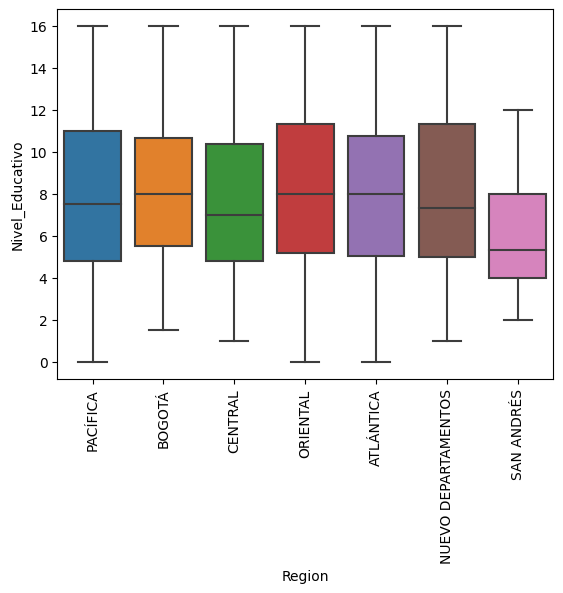

In [75]:
#4. cual es la region que presenta mejores niveles educativos?
df["Region"].unique()
sns.boxplot(data=df, x='Region',y='Nivel_Educativo')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'PACÍFICA'),
  Text(1, 0, 'BOGOTÁ'),
  Text(2, 0, 'CENTRAL'),
  Text(3, 0, 'ORIENTAL'),
  Text(4, 0, 'ATLÁNTICA'),
  Text(5, 0, 'NUEVO DEPARTAMENTOS'),
  Text(6, 0, 'SAN ANDRÉS')])

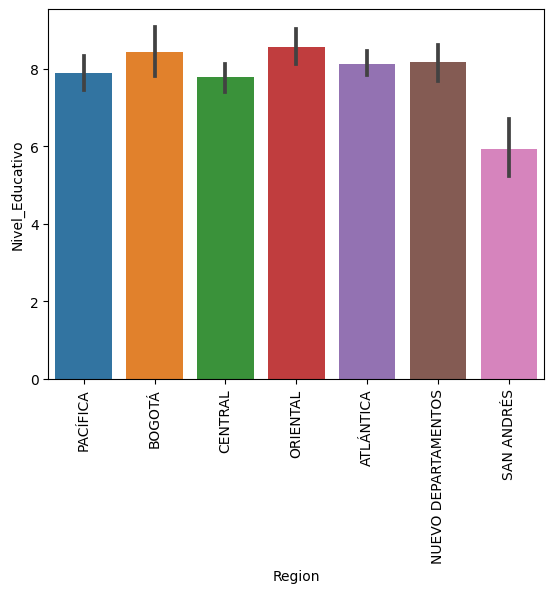

In [79]:
sns.barplot(data=df, x="Region", y="Nivel_Educativo")
plt.xticks(rotation=90)